<a href="https://colab.research.google.com/github/con11235/covid19_visualize/blob/master/Data%20Processing/data_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' 
!apt -qq -y install fonts-nanum
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
adstrd=pd.read_csv('/content/gdrive/My Drive/dacon/adstrd_master.csv')
adstrd.head()

,adstrd_code,adstrd_nm,brtc_nm,signgu_nm
0,11110515.0,청운효자동,서울특별시,종로구
1,11110530.0,사직동,서울특별시,종로구
2,11110540.0,삼청동,서울특별시,종로구
3,11110550.0,부암동,서울특별시,종로구
4,11110560.0,평창동,서울특별시,종로구


Card data

In [ ]:
card=pd.read_csv('/content/gdrive/My Drive/dacon/card.csv')
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000


265

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

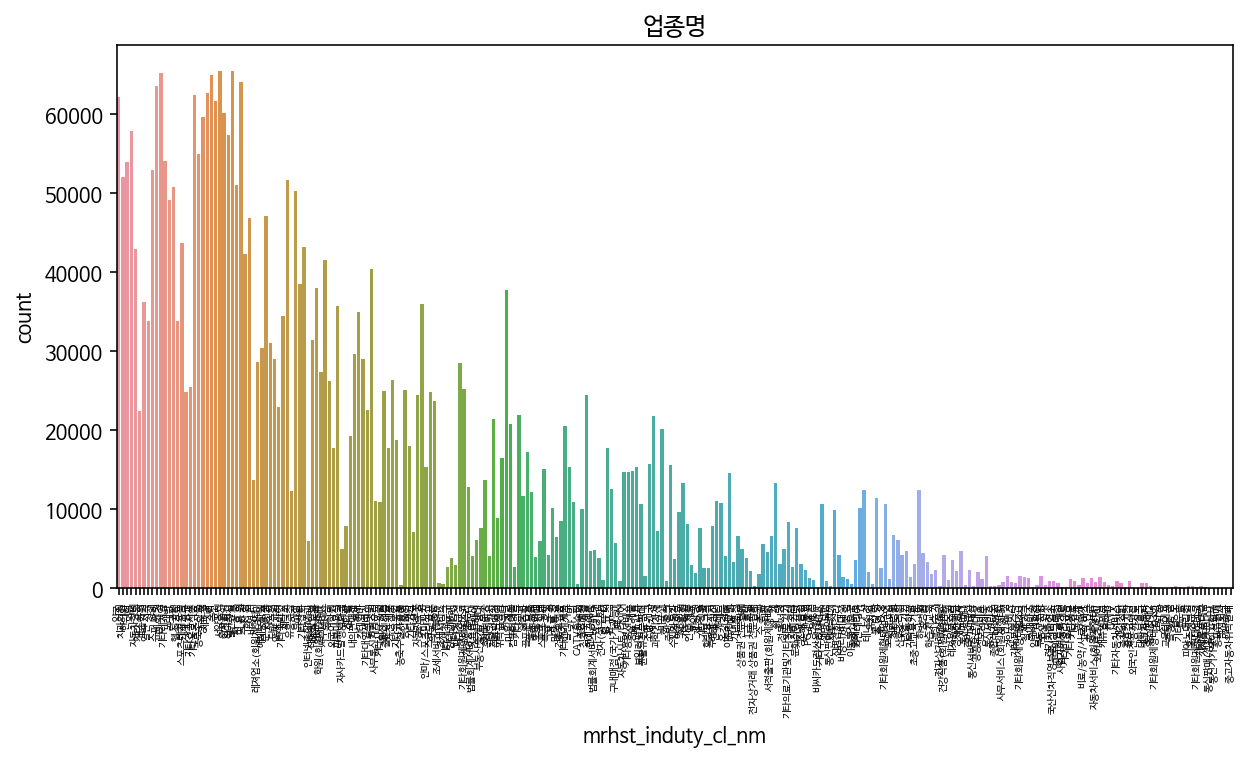

In [ ]:
plt.figure(figsize=(10 ,5))
sns.countplot(x='mrhst_induty_cl_nm',data=card)
plt.title('업종명')
plt.xticks(rotation=90,fontsize=5)

In [ ]:
#data_3=pd.read_excel('COVID_eng_kor_table.xlsx')#->영문/한글 변경시 사

Delivery

In [ ]:
delivery=pd.read_csv('/content/gdrive/My Drive/dacon/delivery.csv')
delivery.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,DLVR_STORE_DONG,DLVR_STORE_RI,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_SIDO,DLVR_DSTN_SIGUNGU,DLVR_DSTN_DONG,DLVR_DSTN_RI,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,합성동,NaN,4812759000,4.812748e+11,4.812710e+09,경상남도,창원시 마산회원구,석전동,NaN,4.812754e+09,4.812748e+11,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,철산동,NaN,4121061000,4.121030e+11,1.154510e+09,서울특별시,금천구,가산동,NaN,1.154551e+09,1.154531e+11,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,갈현동,NaN,1138055100,1.138041e+11,1.138010e+09,서울특별시,은평구,갈현동,NaN,1.138055e+09,1.138041e+11,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,의정부동,NaN,4115051000,4.115043e+11,4.115010e+09,경기도,의정부시,의정부동,NaN,4.115051e+09,4.115043e+11,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,행신동,NaN,4128164000,4.128144e+11,4.128110e+09,경기도,고양시 덕양구,주교동,NaN,4.128151e+09,4.128144e+11,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


In [ ]:
sns.countplot(x='DLVR_STORE_INDUTY_NM',data=delivery)
plt.title('폼묵별')
plt.xticks(rotation=70)
plt.figure(figsize=(100,100))
plt.show()

NameError: ignored

### fpopl유동인구

In [ ]:
fpopl=pd.read_csv('/content/gdrive/My Drive/dacon/fpopl.csv')
fpopl.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt
0,20200101,0,M,age_00,11650560,15
1,20200101,0,M,age_00,11590620,6
2,20200101,0,M,age_00,11560710,4
3,20200101,0,M,age_00,11470680,12
4,20200101,0,M,age_00,11350665,6


Index

*달별/품목별/지역별/나이대별/성별 배열 (한지역 36개)

*   나이대 : 20,30,40,50,60,all (6개)
*   성별 : F,M,all (3개)
*   지역 : 26개
*   품목 : 17개


In [ ]:
index=pd.read_csv('/content/gdrive/My Drive/dacon/index.csv')

year_col=[]
month_col=[]
for i in range(len(index['period'])):
  year_col.append(int(index['period'][i]/100))
  if index['period'][i]-201900 >100:
    month_col.append(index['period'][i]-202000)
  else:
    month_col.append(index['period'][i]-201900)
index['year']=year_col
index['month']=month_col

index=index.sort_values(by=['month','catm','sigungu'])

index=index.reset_index()
index=index.drop(['index'], axis=1)


index_s=index.sort_values(by=['month','catm','sigungu','age','gender'])

index_s=index_s.reset_index()
index_s=index_s.drop(['index'], axis=1)

index_by_catm=index_s[index_s['sigungu']=='all']
index_by_catm=index_by_catm[index_by_catm['month']<=5]
index_by_catm=index_by_catm[index_by_catm['gender']=='all']
index_by_catm=index_by_catm[index_by_catm['age']=='all']
index_by_catm=index_by_catm.reset_index()
index_by_catm=index_by_catm.drop(['index'], axis=1)



서울 시군구 all인걸 먼저 확인

\n성별 구분도 일단x

나이대도 구분x

In [ ]:
index_2019=index_by_catm[index_by_catm['year']==2019]
index_2020=index_by_catm[index_by_catm['year']==2020]

index_201901=index_2019[index_2019['month']==1]
index_202001=index_2020[index_2020['month']==1]

index_201903=index_2019[index_2019['month']==3]
index_202003=index_2020[index_2020['month']==3]

index_201905=index_2019[index_2019['month']==5]
index_202005=index_2020[index_2020['month']==5]


In [ ]:
index_19 = index_2019.drop_duplicates(['catm'],keep='first')
index_19= index_19.loc[:,['catm']]

index_19=index_19.reset_index()
index_19=index_19.drop(['index'], axis=1)

catm=[]
for i in range(len(index_19)):
  catm.append(index_19['catm'][i])

print(catm)

['가공식품', '건강관리용품', '기타화장품', '기호식품', '담배', '바디/헤어용품', '뷰티소품', '빙과류', '빵류', '생활용품', '신선식품', '애완동물용품', '유제품류', '음료', '제과류', '주류', '화장품']


5월 : 2020년 데이터에 빠진 부분 제거

In [ ]:
catm_202005 = index_202005.drop_duplicates(['catm'],keep='first')
catm_202005= index_202005.loc[:,['catm']]
catm_2005=[]
for i in range(len(catm_2005)):
  catm_2005.append(catm_202005['catm'][i])


index값 정렬

In [ ]:

index_2019=index_2019.reset_index()
index_2019=index_2019.drop(['index'], axis=1)

index_2020=index_2020.reset_index()
index_2020=index_2020.drop(['index'], axis=1)

#1월
index_201901=index_201901.reset_index()
index_201901=index_201901.drop(['index'], axis=1)

index_202001=index_202001.reset_index()
index_202001=index_202001.drop(['index'], axis=1)

#3월
index_201903=index_201903.reset_index()
index_201903=index_201903.drop(['index'], axis=1)

index_202003=index_202003.reset_index()
index_202003=index_202003.drop(['index'], axis=1)

#5월
index_201905=index_201905.reset_index()
index_201905=index_201905.drop(['index'], axis=1)

index_202005=index_202005.reset_index()
index_202005=index_202005.drop(['index'], axis=1)


1,3,5월 비교

1월 : 코로나 이전
3월 : 코로나 확산이 가장 퍼졌을 시기
5월 : 잠잠해졌다가 다시 심해진 시기



In [ ]:
catm_by_jan=dict()

for i in range(len(index_201901)):
  name=index_201901['catm'][i]
  input_L=[]
  input_L.append(index_201901['cgi'][i])
  input_L.append(index_202001['cgi'][i])
  catm_by_jan[name]=input_L


catm_jan=pd.DataFrame(catm_by_jan)
catm_jan=np.transpose(catm_jan)
catm_jan.columns=['201901','202001']
catm_jan['diff']=catm_jan['202001']-catm_jan['201901']

catm_jan=catm_jan.reset_index()


In [ ]:
catm_by_mar=dict()

for i in range(len(index_201903)):
  name=index_201903['catm'][i]
  input_L=[]
  input_L.append(index_201903['cgi'][i])
  input_L.append(index_202003['cgi'][i])
  catm_by_mar[name]=input_L


catm_mar=pd.DataFrame(catm_by_mar)
catm_mar=np.transpose(catm_mar)
catm_mar.columns=['201903','202003']
catm_mar['diff']=catm_mar['202003']-catm_mar['201903']
catm_mar=catm_mar.reset_index()

2019,2020 품목별 비교

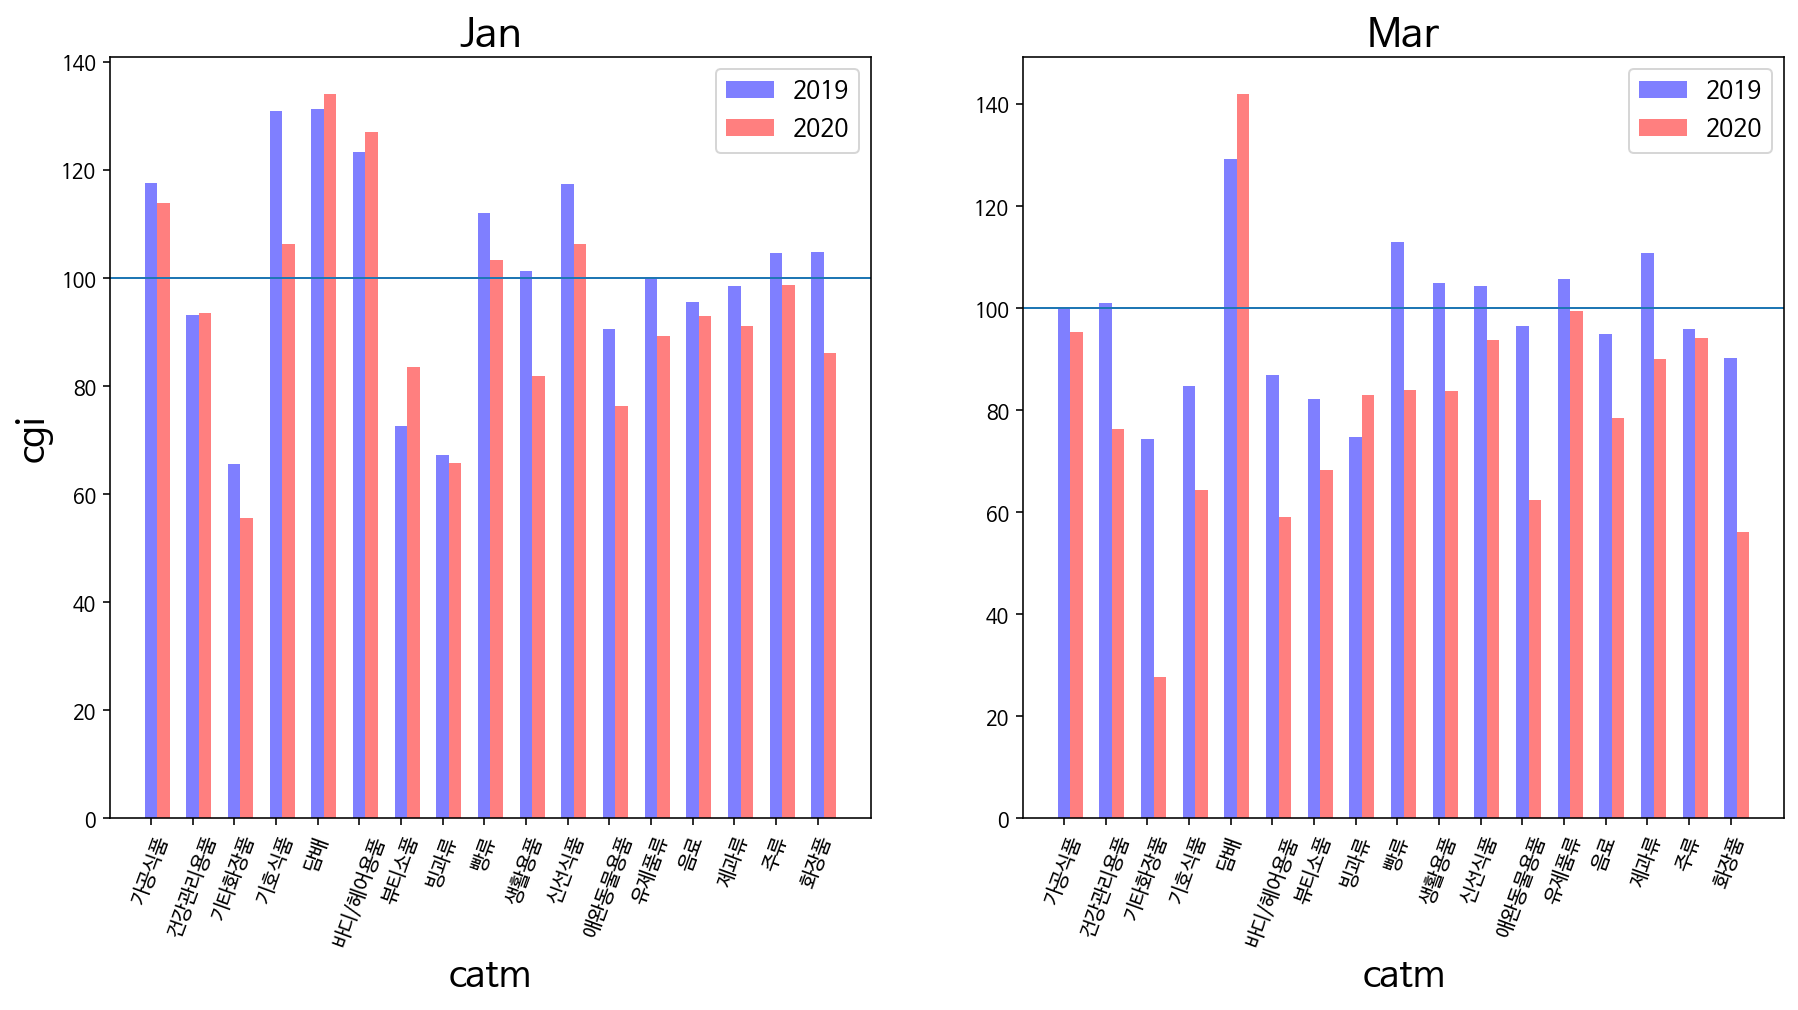

In [ ]:

label=catm
index=np.arange(len(label))

bar_width=0.3
alpha=0.5


plt.rcParams["figure.figsize"] = (15,7)

plt.subplot(1,2,1)
p1=plt.bar(index,catm_jan['201901'],bar_width,color='b',alpha=alpha, label=2019)
p2=plt.bar(index+bar_width,catm_jan['202001'],bar_width,color='r',alpha=alpha, label=2020)
plt.title('Jan',fontsize=20)
plt.xlabel('catm',fontsize=18)
plt.ylabel('cgi',fontsize=18)
plt.xticks(index,label,fontsize=10,rotation=70)
plt.legend((p1[0],p2[0]),('2019','2020'),fontsize=12)
plt.axhline(y=100,linewidth=1)


plt.subplot(1,2,2)

p3=plt.bar(index,catm_mar['201903'],bar_width,color='b',alpha=alpha, label=2019)
p4=plt.bar(index+bar_width,catm_mar['202003'],bar_width,color='r',alpha=alpha, label=2020)
plt.title('Mar',fontsize=20)
plt.xlabel('catm',fontsize=18)
plt.xticks(index,label,fontsize=10,rotation=70)
plt.legend((p1[0],p2[0]),('2019','2020'),fontsize=12)
plt.axhline(y=100,linewidth=1)


plt.show()




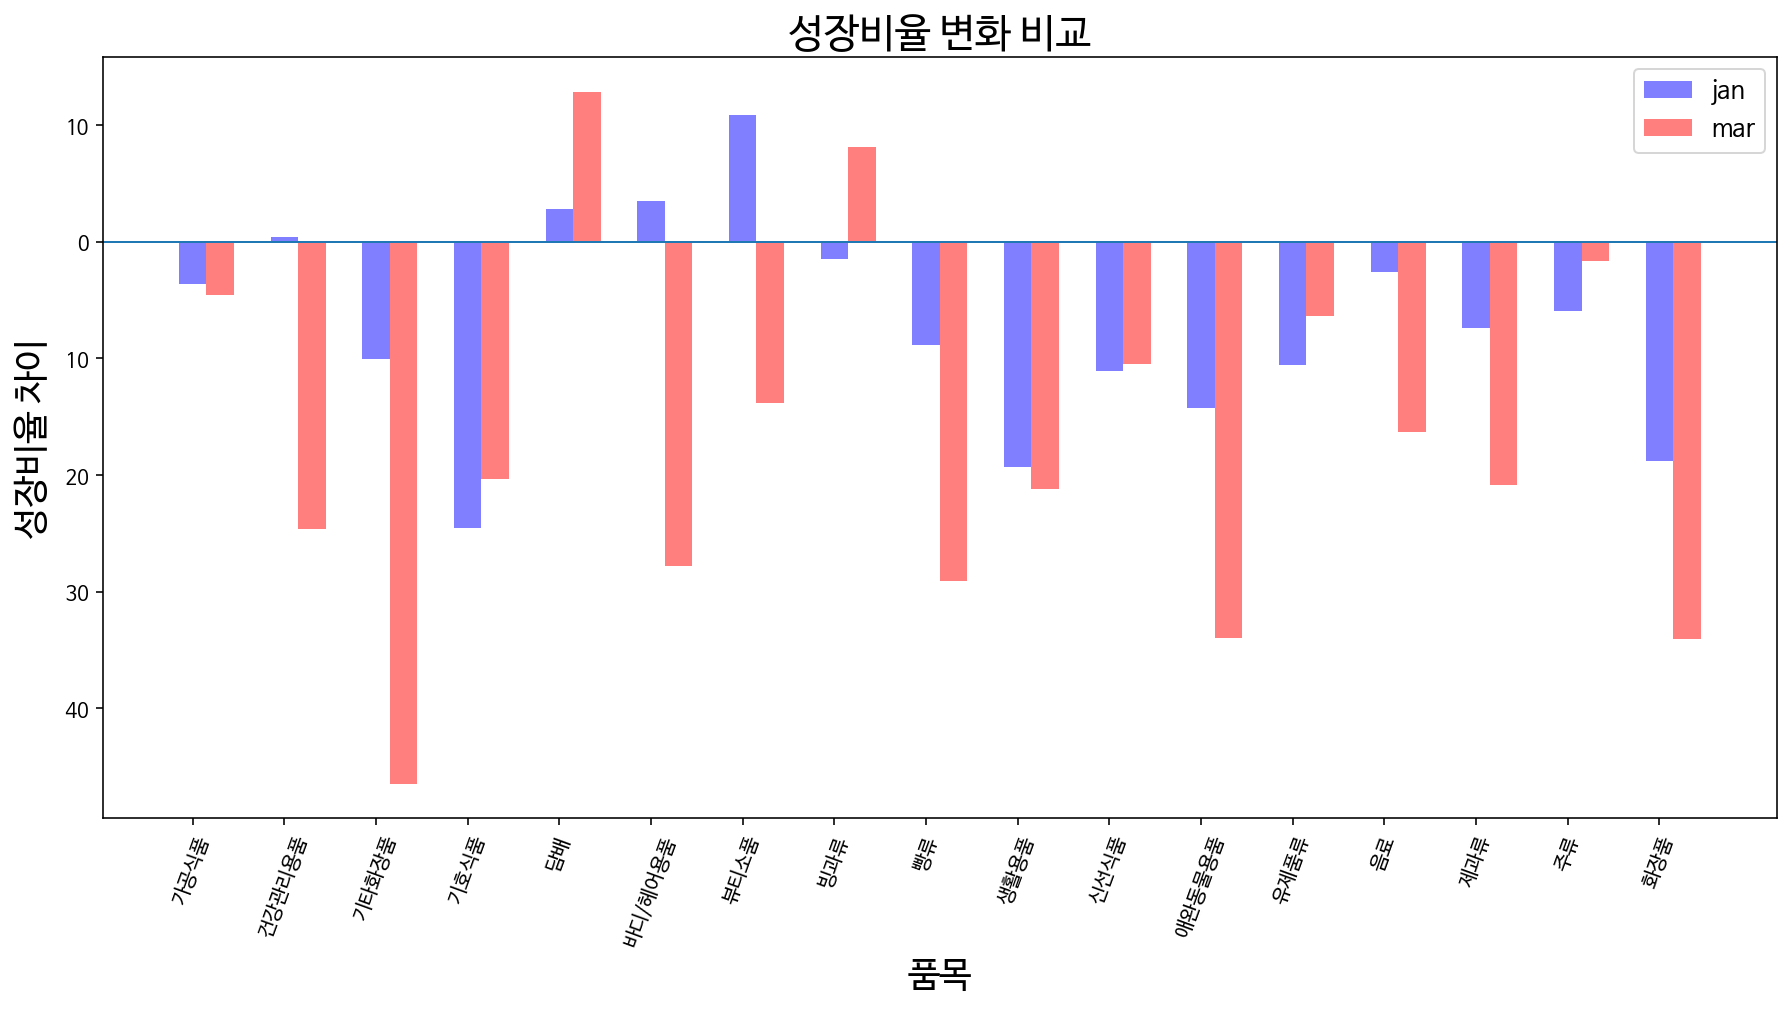

In [ ]:

label=catm
index=np.arange(len(label))

bar_width=0.3
alpha=0.5


plt.rcParams["figure.figsize"] = (15,7)

p1=plt.bar(index,catm_jan['diff'],bar_width,color='b',alpha=alpha, label='jan')
p2=plt.bar(index+bar_width,catm_mar['diff'],bar_width,color='r',alpha=alpha, label='mar')
plt.title('성장비율 변화 비교',fontsize=20)
plt.xlabel('품목',fontsize=18)
plt.ylabel('성장비율 차이',fontsize=18)
plt.xticks(index,label,fontsize=10,rotation=70)
plt.legend((p1[0],p2[0]),('jan','mar'),fontsize=12)
plt.axhline(y=0,linewidth=1)




성장비율 차이= 2019년 성장비율-2020년 성장비율


SyntaxError: ignored

In [ ]:
dic_3.update(dic_1)
print(dic_3)

{'가공식품': [117.57091899999999, 113.92681019999999], '건강관리용품': [93.14822348, 93.55641316], '기타화장품': [65.64975066, 55.61748313], '기호식품': [130.918672, 106.3439719], '담배': [131.34247309999998, 134.115702], '바디/헤어용품': [123.4022917, 126.9413894], '뷰티소품': [72.57839579, 83.47512083], '빙과류': [67.23331115, 65.80177552], '빵류': [112.0923398, 103.25177070000001], '생활용품': [101.2622824, 81.92276397], '신선식품': [117.3829018, 106.28515279999999], '애완동물용품': [90.61327792, 76.34479461], '유제품류': [99.93239859999998, 89.35639198], '음료': [95.52503598, 92.97432476], '제과류': [98.43432584, 91.05435509], '주류': [104.5888276, 98.69129528], '화장품': [104.8825193, 86.05638651]}


In [ ]:
test_df=pd.DataFrame(dic_1)
test_df

,가공식품,건강관리용품,기타화장품,기호식품,담배,바디/헤어용품,뷰티소품,빙과류,빵류,생활용품,신선식품,애완동물용품,유제품류,음료,제과류,주류,화장품
0,117.570919,93.148223,65.649751,130.918672,131.342473,123.402292,72.578396,67.233311,112.092340,101.262282,117.382902,90.613278,99.932399,95.525036,98.434326,104.588828,104.882519
1,113.926810,93.556413,55.617483,106.343972,134.115702,126.941389,83.475121,65.801776,103.251771,81.922764,106.285153,76.344795,89.356392,92.974325,91.054355,98.691295,86.056387


In [ ]:
d_2019=[]
d_2020=[]
for i in range(len(index_by_catm)):
  if index_by_catm['year'][i]==2019:
    ipd={}
    name=index_by_catm['catl'][i]
    cgi=index_by_catm['cgi'][i]
    ipd[name]=cgi
    index_201901.append(id)
  else:
    id={}
    name=index_by_catm['catl']
    id[name]=index_by_catm['cgi'][i]
    index_202001.append(id)




TypeError: ignored

2019/2020 비교

KeyError: ignored

In [ ]:
catm=dr_2.drop_duplicates(['catm'],keep='first')
catm=catm.loc[:,['catm']]
catm=catm.reset_index()
catm=catm.drop(['index'], axis=1)

달별로


In [ ]:
catm_comp=dict()
a=[]
c=[]


for i in range(len(index_by_catm)):
  month=index_by_catm['month'][i]
  if month not in a:
    name=index_by_catm['catm'][j]
    if name in c:
      catm_comp[month][name].append(index_by_catm['cgi'][i])
      
    else:
      inputd={}
      inputL=[]
      inputL.append(dr_2['cgi'][i])
      inputd[name]=inputL
      catm_comp[month]=inputd
      c.append(name)
        
  

  a.append(month)

print(catm_comp)





NameError: ignored

In [ ]:
catm_comp=dict()
a=[]

for i in range(len(dr_2)):
  name=dr_2['catm'][i]
  month=dr_2['month'][i]
  if month not in a:
    if name in catm_comp[month].keys():
      inputd[month][name].append(dr_2['cgi'][i])
    else:
      inputd={}
      inputd[name]=dr_2['cgi'][i]
      
      catm_comp[month][name]=inputL
  else:

   a.append(month)



print(catm_comp)

  

    

NameError: ignored

KeyError: ignored

In [ ]:
#시군구 종류
sig=df_1.drop_duplicates(['sigungu'],keep='first')
sig=sig.loc[:,['sigungu']]
len(sig)

26

In [ ]:
#품목 종류
catm=df_1.drop_duplicates(['catm'],keep='first')
catm=catm.loc[:,['catm']]
catm=catm.reset_index()
catm=catm.drop(['index'], axis=1)
len(catm)

17

In [ ]:
#년도,달별
period=df_1.drop_duplicates(['period'],keep='first')
period=period.loc[:,['period']]
period=period.reset_index()
period=period.drop(['index'], axis=1)
len(period)

17

In [ ]:
#100이상만 남기기
up=df_1[df_1['cgi']>=100]
down=df_1[df_1['cgi']<100]
up



,period,catm,age,gender,sido,sigungu,cgi,year,month,total_nm
0,201901,건강관리용품,20,F,서울,관악구,115.374642,2019,1,서울 관악구
1,201901,건강관리용품,20,F,서울,광진구,119.596454,2019,1,서울 광진구
2,201901,건강관리용품,20,F,서울,도봉구,156.992847,2019,1,서울 도봉구
4,201901,건강관리용품,20,F,서울,마포구,145.147595,2019,1,서울 마포구
7,201901,건강관리용품,20,M,서울,all,102.170986,2019,1,서울 all
...,...,...,...,...,...,...,...,...,...,...
127400,202005,주류,all,F,서울,서초구,105.601034,2020,5,서울 서초구
127404,202005,주류,all,F,서울,중랑구,101.971130,2020,5,서울 중랑구
127412,202005,주류,all,all,서울,금천구,111.219339,2020,5,서울 금천구
127417,202005,주류,all,all,서울,영등포구,106.408920,2020,5,서울 영등포구


In [ ]:
df_1['sigungu'] = df_1['sigungu'].fillna('')
df_1['total_nm'] =df_1['sido'] + ' ' + df_1['sigungu']

df_1.head()

,period,catm,age,gender,sido,sigungu,cgi,year,month,total_nm
0,201901,건강관리용품,20,F,서울,관악구,115.374642,2019,1,서울 관악구
1,201901,건강관리용품,20,F,서울,광진구,119.596454,2019,1,서울 광진구
2,201901,건강관리용품,20,F,서울,도봉구,156.992847,2019,1,서울 도봉구
3,201901,건강관리용품,20,F,서울,동작구,58.342726,2019,1,서울 동작구
4,201901,건강관리용품,20,F,서울,마포구,145.147595,2019,1,서울 마포구


1) 업종별

In [ ]:
#지역, 품목별 cgi 비교

df_2=df_1.drop(['period','gender','sido','total_nm'],axis=1)
df_2.head()

,catm,age,sigungu,cgi,year,month
0,건강관리용품,20,관악구,115.374642,2019,1
1,건강관리용품,20,광진구,119.596454,2019,1
2,건강관리용품,20,도봉구,156.992847,2019,1
3,건강관리용품,20,동작구,58.342726,2019,1
4,건강관리용품,20,마포구,145.147595,2019,1


In [ ]:
df=df_2[df_2['catm']=='건강관리용품']
df=df[df['month']==1]
df['age'].value_counts()
df

,catm,age,sigungu,cgi,year,month
0,건강관리용품,20,관악구,115.374642,2019,1
1,건강관리용품,20,광진구,119.596454,2019,1
2,건강관리용품,20,도봉구,156.992847,2019,1
3,건강관리용품,20,동작구,58.342726,2019,1
4,건강관리용품,20,마포구,145.147595,2019,1
...,...,...,...,...,...,...
97350,건강관리용품,all,광진구,88.136296,2020,1
97351,건강관리용품,all,구로구,63.018603,2020,1
97352,건강관리용품,all,서대문구,119.418157,2020,1
97353,건강관리용품,all,서초구,101.988565,2020,1


In [ ]:
sig=df.drop_duplicates(['sigungu'],keep='first')
sig=sig.loc[:,['sigungu']]
sig.head()



26

In [ ]:
comp=dict()
for i in range(len(df)):
  for j in range(len(sig)):
    name=sig['sigugu'][i]
    if name in address:
      if

건강관리 용품